# Import libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import results

In [43]:
df = pd.read_csv("Results/Total_score.csv", index_col=0)
df.head()

,Full Text,Generated Text,Actual Text,Finetune,Category,Rouge-1,Rouge-2,Rouge-l,BERTscore
0,Peugeot deal boosts Mitsubishi Struggling Japa...,Japanese car maker Mitsubishi Motors has struc...,Struggling Japanese car maker Mitsubishi Motor...,business,business,0.638037,0.567568,0.638037,0.573879
1,Japan bank shares up on link talk Shares of Su...,"SMFG shares climbed by 2.7% to 717,000, and Da...","Shares of Sumitomo Mitsui Financial (SMFG), an...",business,business,0.608108,0.438202,0.594595,0.511145
2,Ebbers 'aware' of WorldCom fraud Former WorldC...,"Mr Ebbers has denied all the charges, saying h...",Mr Sullivan is at the centre of the government...,business,business,0.589041,0.510000,0.575342,0.498677
3,Barclays shares up on merger talk Shares in UK...,Shares in UK banking group Barclays have risen...,Shares in UK banking group Barclays have risen...,business,business,0.715152,0.691244,0.715152,0.632184
4,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,The company should now be able put this disput...,business,business,0.907895,0.874419,0.907895,0.796049


# Create a dictionary for each Finetune dataset and Testing dataset

In [44]:
score_list = ['Rouge-1','Rouge-2','Rouge-l','BERTscore']
Sum_score_dict = {}
# Sum_score_dict.keys = score_list
for score in score_list:
    df_mean = df.groupby(['Finetune', 'Category']).agg({score: ['mean']})
    df_mean = df_mean.pivot_table(score, ['Finetune'], 'Category')
    df_mean = df_mean.droplevel(0, axis=1)
    Sum_score_dict[score] = df_mean
df_mean.head()


Category,Mixed,business,entertainment,politics,sport,tech
Finetune,,,,,,
Mixed,0.551812,0.588823,0.577647,0.489123,0.521240,0.561891
business,0.515950,0.558997,0.546102,0.487817,0.514656,0.506448
entertainment,0.524021,0.542703,0.605194,0.456352,0.507982,0.493353
politics,0.548226,0.601214,0.542794,0.532229,0.508551,0.510182
sport,0.548689,0.565568,0.561628,0.449704,0.536579,0.503763


# Heatmap plot

In [45]:
def plot_heatmap(dict, key):
    sns.set(rc={'figure.figsize':(10, 8)})
    ax = sns.heatmap(dict[key], annot=True, cmap="YlGnBu", fmt='.3g')
    plt.yticks(rotation=0)
    ax.xaxis.tick_top()
    plt.tick_params(top = False)
    ax.xaxis.set_label_position('top')
    plt.title(key, y=-.08, fontsize=20)
    # plt.savefig('Heatmap_'+key+'.png')
    plt.show()

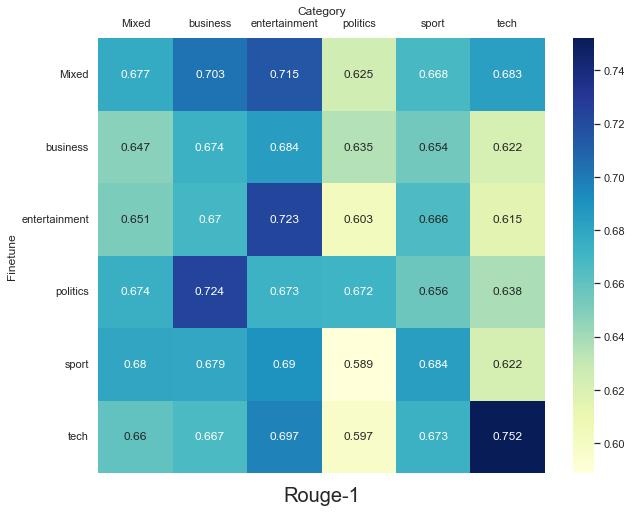

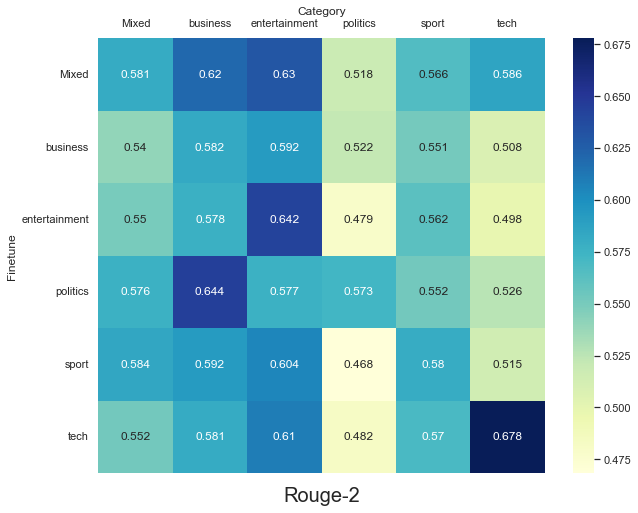

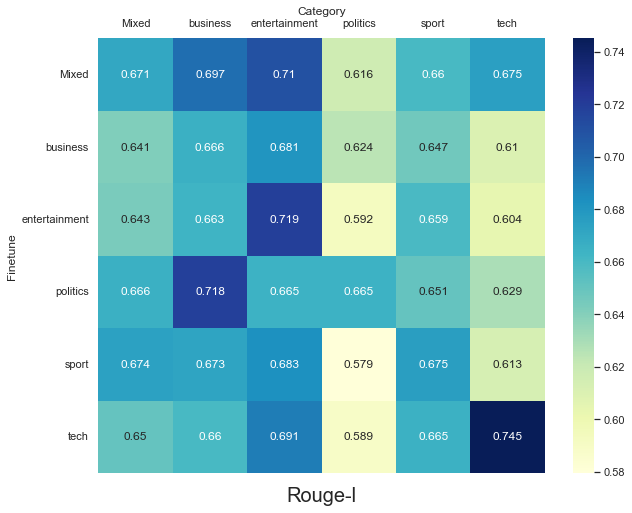

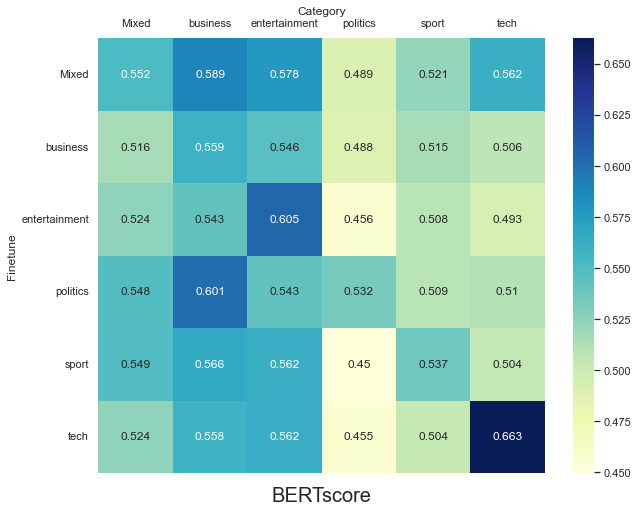

In [46]:
for score in score_list:
    plot_heatmap(Sum_score_dict, score)

In [47]:
# df_mean.style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '20px'})

# Boxplot plot

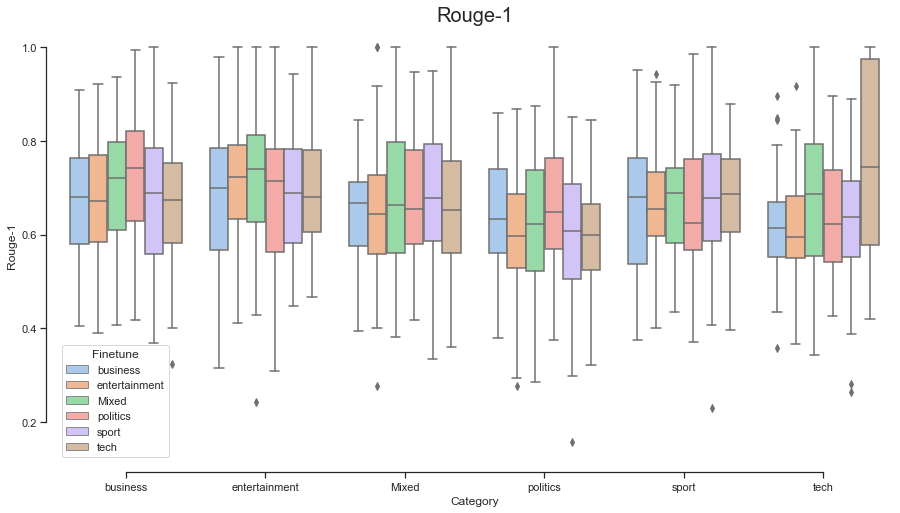

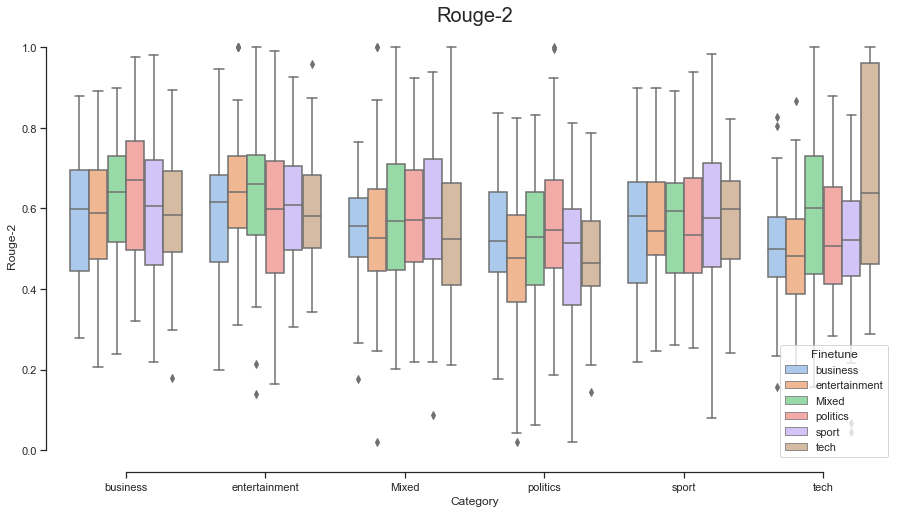

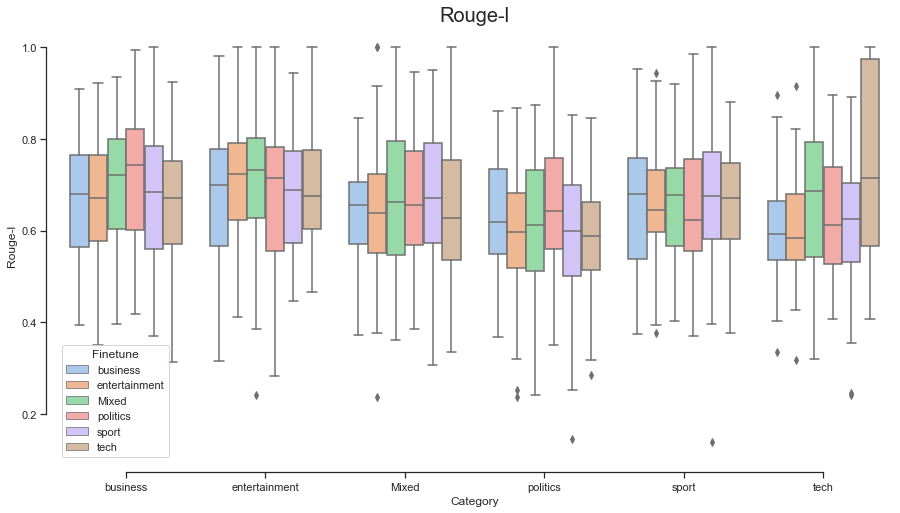

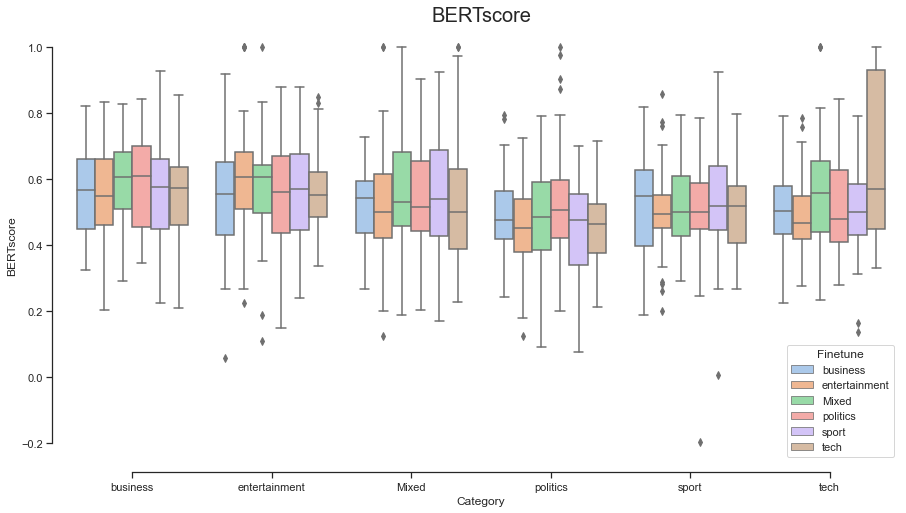

In [48]:
for score in score_list:
    sns.set(rc={'figure.figsize':(15, 8)})
    sns.set_theme(style="ticks", palette="pastel")
    sns.boxplot(x="Category", y=score,
                hue="Finetune",
                data=df)
    sns.despine(offset=10, trim=True)
    plt.title(score, fontsize=20)
    plt.show()

# Tokenize lenght

In [49]:
model_params={
    "MODEL":"t5-base",             # model_type: t5-base/t5-large
    "SEED": 42                     # set seed for reproducibility 
}

from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained(model_params["MODEL"])

import torch
# Set random seeds and deterministic pytorch for reproducibility
torch.manual_seed(model_params["SEED"]) # pytorch random seed
np.random.seed(model_params["SEED"]) # numpy random seed
torch.backends.cudnn.deterministic = True

In [50]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
df_tkn = pd.DataFrame()
df_tkn['tokenized_sents'] = df.apply(lambda row: tokenizer(row['Actual Text']), axis=1)
df['Actual_tkn_len'] = df_tkn.apply(lambda row: len(row['tokenized_sents']['input_ids']), axis=1)

df_tkn['tokenized_sents'] = df.apply(lambda row: tokenizer(row['Generated Text']), axis=1)
df['Generate_tkn_len'] = df_tkn.apply(lambda row: len(row['tokenized_sents']['input_ids']), axis=1)

df.head()

,Full Text,Generated Text,Actual Text,Finetune,Category,Rouge-1,Rouge-2,Rouge-l,BERTscore,Actual_tkn_len,Generate_tkn_len
0,Peugeot deal boosts Mitsubishi Struggling Japa...,Japanese car maker Mitsubishi Motors has struc...,Struggling Japanese car maker Mitsubishi Motor...,business,business,0.638037,0.567568,0.638037,0.573879,170,155
1,Japan bank shares up on link talk Shares of Su...,"SMFG shares climbed by 2.7% to 717,000, and Da...","Shares of Sumitomo Mitsui Financial (SMFG), an...",business,business,0.608108,0.438202,0.594595,0.511145,178,153
2,Ebbers 'aware' of WorldCom fraud Former WorldC...,"Mr Ebbers has denied all the charges, saying h...",Mr Sullivan is at the centre of the government...,business,business,0.589041,0.510000,0.575342,0.498677,179,167
3,Barclays shares up on merger talk Shares in UK...,Shares in UK banking group Barclays have risen...,Shares in UK banking group Barclays have risen...,business,business,0.715152,0.691244,0.715152,0.632184,174,147
4,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,The company should now be able put this disput...,business,business,0.907895,0.874419,0.907895,0.796049,178,179


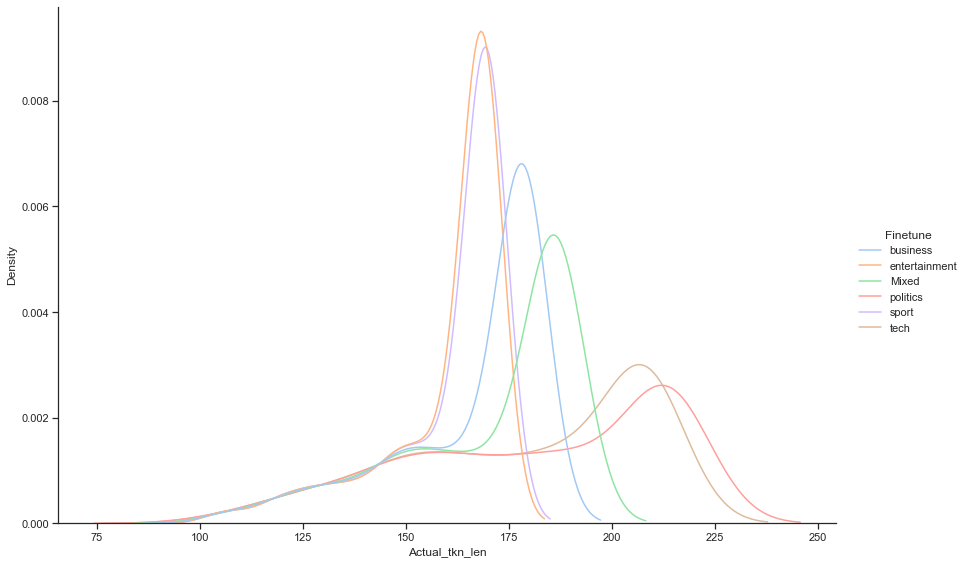

In [51]:
sns.displot(
    data = df, 
    x = 'Actual_tkn_len', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "Finetune",
    height = 8,
    aspect = 1.5
    )

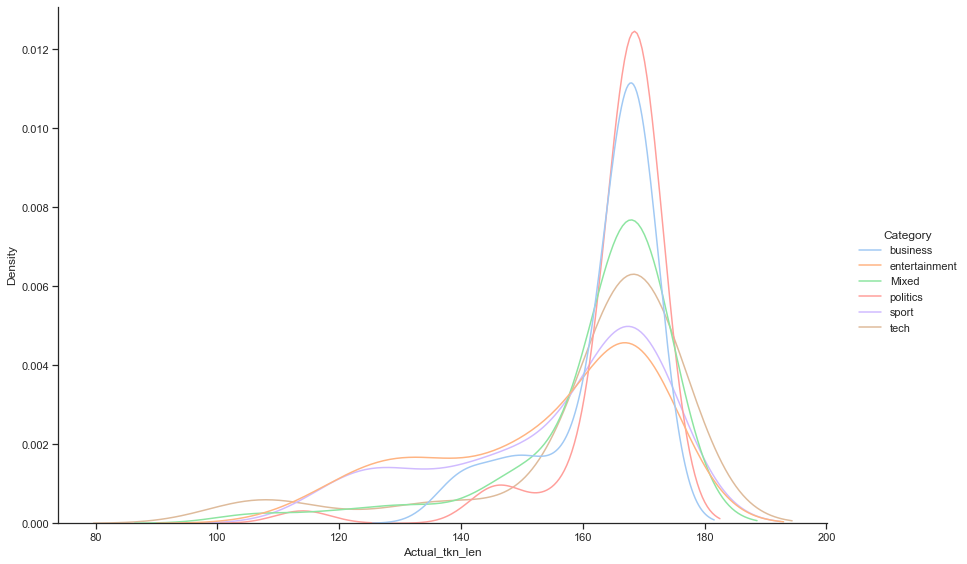

In [52]:
sns.displot(
    data = df[df.Finetune == "entertainment"], 
    x = 'Actual_tkn_len', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "Category",
    height = 8,
    aspect = 1.5
    )

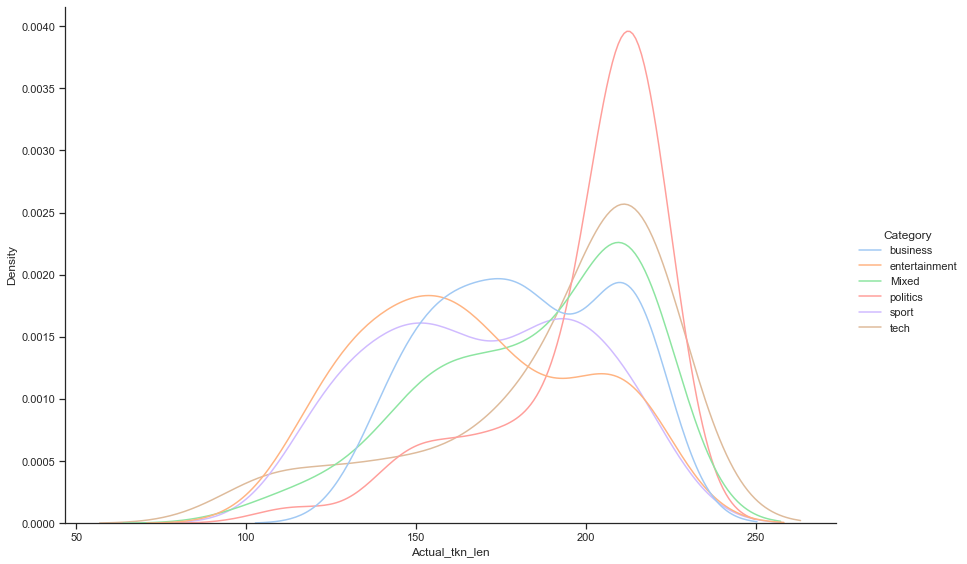

In [53]:
sns.displot(
    data = df[df.Finetune == "politics"], 
    x = 'Actual_tkn_len', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "Category",
    height = 8,
    aspect = 1.5
    )

C:\Users\THETANG\AppData\Local\Temp\ipykernel_11808\3454010174.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ = df_[df.Category == "entertainment"]


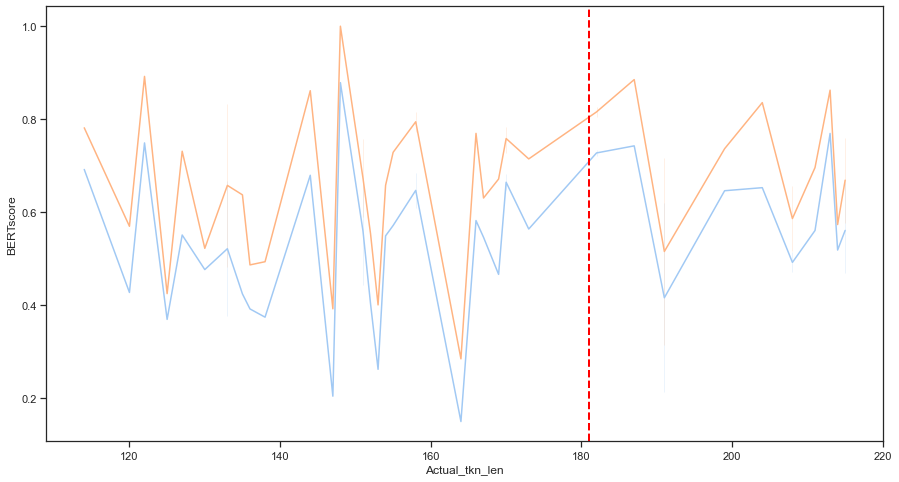

In [54]:
df_ = df[df.Finetune == "politics"]
df_ = df_[df.Category == "entertainment"]
sns.lineplot(
    data = df_, 
    x = 'Actual_tkn_len',
    y = 'BERTscore'
    )
sns.lineplot(
    data = df_, 
    x = 'Actual_tkn_len',
    y = 'Rouge-l'
    )
plt.axvline(x=181,
            color='red',
            ls='--', 
            lw=2)

In [55]:
Real_df = pd.read_csv('Dataset_Evaluate_Mixed.csv')
Real_df

,Unnamed: 0,articles,summaries,categories
0,0,French boss to leave EADS The French co-head o...,The company should now be able put this disput...,business
1,1,WorldCom bosses' $54m payout Ten former direct...,"""None of the 10 former directors was a direct ...",business
2,2,Ebbers 'aware' of WorldCom fraud Former WorldC...,Mr Sullivan is at the centre of the government...,business
3,3,Brazil jobless rate hits new low Brazil's unem...,Brazil's unemployment rate fell to its lowest ...,business
4,4,Ban on forced retirement under 65 Employers wi...,Trade and Industry Secretary Patricia Hewitt s...,business
...,...,...,...,...
277,277,Robinson out of Six Nations England captain Ja...,England captain Jason Robinson will miss the r...,Mixed
278,278,Monsanto fined $1.5m for bribery The US agroch...,Monsanto also has admitted to paying bribes to...,Mixed
279,279,"Housing plans criticised by MPs ""Irreversible ...",The report was a stinging rebuke for the gover...,Mixed
280,280,Iraq and Afghanistan in WTO talks The World Tr...,There are now 27 countries seeking membership ...,Mixed


In [56]:
for _, row in df.iterrows():
    string = (row['Generated Text'])
    break
string

"Japanese car maker Mitsubishi Motors has struck a deal to supply French car maker Peugeot with 30,000 sports utility vehicles (SUV).The deal with Peugeot was celebrated by Mitsubishi's newly-appointed chief executive Takashi Nishioka, who took over after three top bosses stood down last month to shoulder responsibility for the firm's troubles.Last month, it signed a production agreement with Japanese rival Nissan Motor to supply it with 36,000 small cars for sale in Japan.The alliance comes as a badly-needed boost for loss-making Mitsubishi, after several profit warnings and poor sales.In January, Mitsubishi Motors issued its third profits warning in nine months, and cut its sales forecasts for the year to March 2005."

In [57]:
Real_sum = list(Real_df["summaries"])
Real_sum[0]

"The company should now be able put this dispute behind it, with the departure of Mr Camus and with the clear support given to Mr Forgeard by the Lagardere group, the main French shareholder of EADS.The other main shareholders of EADS are the French government (15%) , who also support Mr Forgeard, and Germany's DaimlerChrysler (30%).Mr Camus said in a statement that he has accepted the invitation to return full-time to the Lagardere group, which owns 30% of EADS.Fighting between Mr Camus and Mr Forgeard has hit the headlines in France and analysts feared that this fighting could destabilise the defence and aerospace group.But Mr Forgeard has denied this, telling French media that there is no current overrun in the budget.The French co-head of European defence and aerospace group EADS Philippe Camus is to leave his post."